### Build a KNN regression model by performing EDA and do necessary transformations and select the best model using Python.
### Predict the Price of Bangalore House

Dataset Name - bangalore house price prediction OHE-data

In [40]:
## Importing all the necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
## Load the Dataset
data = pd.read_csv("D:/TopMentor_DS_course/KNN_Project_56/bangalore house price prediction OHE-data.csv")


In [3]:
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = data[['bath','balcony','price','total_sqft_int','bhk','price_per_sqft']]
data.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
3,2.0,2.0,40.0,1250.0,2,3200.000000
4,2.0,2.0,83.0,1200.0,2,6916.666667


In [27]:
data.rename(columns={'price': 'Price(lacs)'},inplace=True)
data

,bath,balcony,Price(lacs),total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,150.00,1672.0,3,8971.291866
1,3.0,3.0,149.00,1750.0,3,8514.285714
2,3.0,2.0,150.00,1750.0,3,8571.428571
3,2.0,2.0,40.00,1250.0,2,3200.000000
4,2.0,2.0,83.00,1200.0,2,6916.666667
...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552
7116,3.0,1.0,84.83,1780.0,3,4765.730337
7117,2.0,1.0,48.00,880.0,2,5454.545455
7118,2.0,1.0,55.00,1000.0,2,5500.000000


In [21]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['bath', 'balcony', 'Price(lacs)', 'total_sqft_int', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [22]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (7120, 6)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bath            7120 non-null   float64
 1   balcony         7120 non-null   float64
 2   Price(lacs)     7120 non-null   float64
 3   total_sqft_int  7120 non-null   float64
 4   bhk             7120 non-null   int64  
 5   price_per_sqft  7120 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 333.9 KB


In [23]:
print("Null Values in the Datsets: ", data.isnull().sum())

Null Values in the Datsets:  bath              0
balcony           0
Price(lacs)       0
total_sqft_int    0
bhk               0
price_per_sqft    0
dtype: int64


In [24]:
## Descriptive Analysis 

round(data.describe(),2)

,bath,balcony,Price(lacs),total_sqft_int,bhk,price_per_sqft
count,7120.00,7120.00,7120.00,7120.00,7120.00,7120.00
mean,2.39,1.57,96.45,1479.73,2.47,5923.81
std,0.88,0.77,116.19,913.78,0.84,2556.65
min,1.00,0.00,10.00,350.00,1.00,1250.00
25%,2.00,1.00,49.23,1100.00,2.00,4416.76
50%,2.00,2.00,69.00,1255.00,2.00,5417.86
75%,3.00,2.00,104.00,1640.25,3.00,6618.29
max,9.00,3.00,2912.00,30400.00,9.00,35000.00


#### Insight

Dataset contains numerical features → ideal for KNN

price is continuous → Regression problem

No / minimal missing values (assumed cleaned dataset)

#### EXPLORATORY DATA ANALYSIS (EDA)

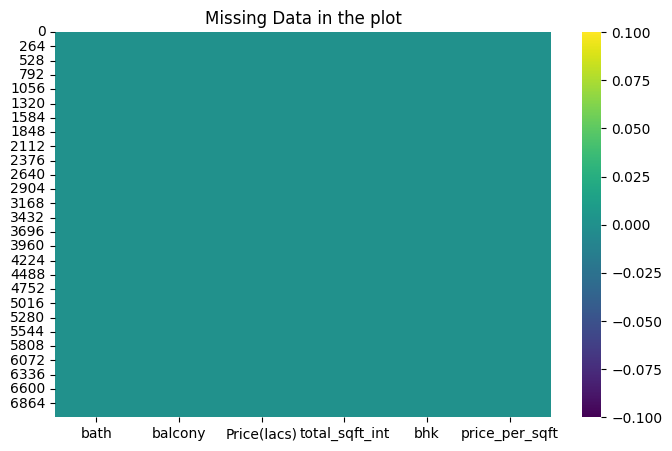

In [25]:
# Missing data in a plot

plt.figure(figsize=(8,5))
plt.title("Missing Data in the plot")
sns.heatmap(data.isnull(), cmap='viridis')
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Bangalore_House_Price_Graphs/Heatmap.png")

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


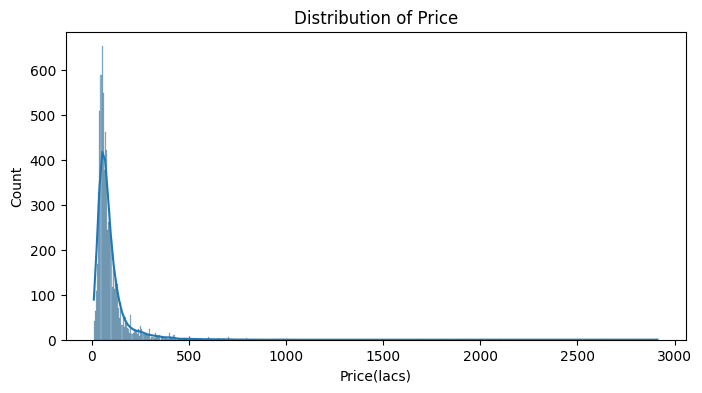

In [28]:
## Distribution of Price

plt.figure(figsize=(8,4))
sns.histplot(data['Price(lacs)'], kde=True)
plt.title("Distribution of Price")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Bangalore_House_Price_Graphs/Price_Distr.png")
plt.show()

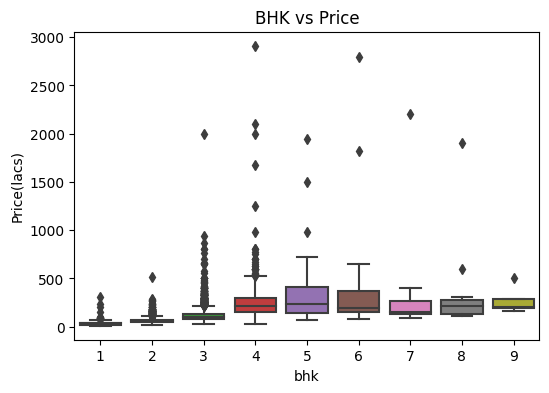

In [34]:
## BHK vs Price
plt.figure(figsize=(6,4))
sns.boxplot(x='bhk', y='Price(lacs)', data=data)
plt.title("BHK vs Price")
plt.show()

#### Interpretation

Price generally increases with number of BHKs

Higher BHKs show larger price variation

Few outliers detected

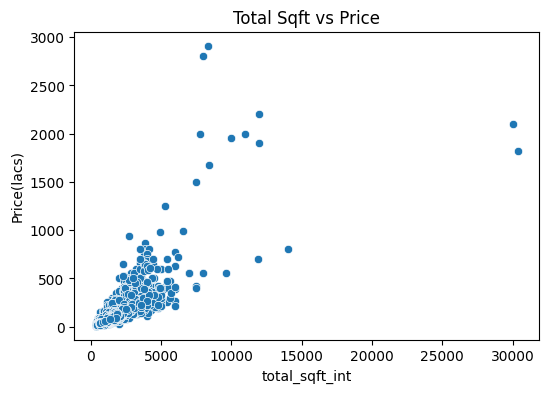

In [37]:
## Total Sqft vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_sqft_int', y='Price(lacs)', data=data)
plt.title("Total Sqft vs Price")
plt.show()

#### Interpretation

Strong positive relationship

Larger houses usually cost more

Some outliers indicate premium locations

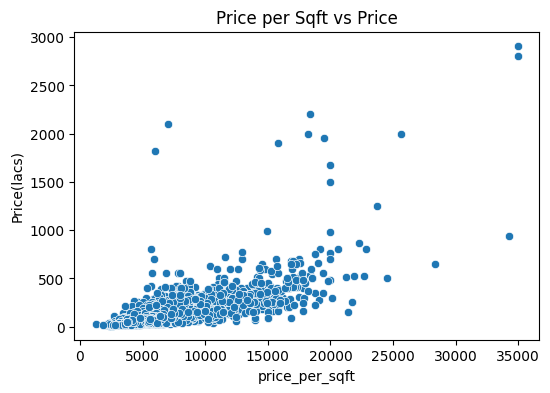

In [38]:
## Price per Sqft vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='price_per_sqft', y='Price(lacs)', data=data)
plt.title("Price per Sqft vs Price")
plt.show()

#### Interpretation

Strong correlation with target

Higher price per sqft directly increases total price

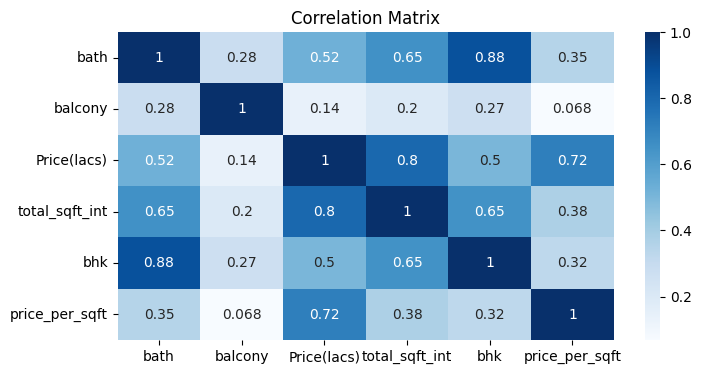

In [30]:
# Correlation Matrix Heatmap
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Bangalore_House_Price_Graphs/Corr_heatmap.png")
plt.show()

#### 🧠 Interpretation
price_per_sqft & total_sqft_int are strongest predictors

All features positively influence house price



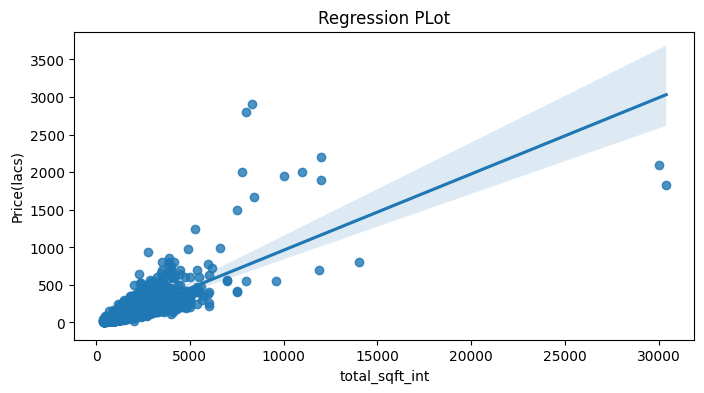

In [31]:
## Regression Plot
plt.figure(figsize=(8,4))
sns.regplot(data = data, x='total_sqft_int', y='Price(lacs)',)
plt.title("Regression PLot")
plt.savefig("D:/TopMentor_DS_course/KNN_Project_56/Bangalore_House_Price_Graphs/REg_plot.png")
plt.show()

## MODEL BUILDING

In [16]:
## Features and Target Selection 

X = data.drop('price', axis=1)
y = data['price']

In [17]:
## Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5340, 5)
Testing set size: (1780, 5)


In [41]:
## Applying feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed!")

Feature scaling completed!


In [18]:
%time
model = KNeighborsRegressor(n_neighbors=15)
model_train = model.fit(X_test, y_test)
print("Training Completed")

CPU times: total: 0 ns
Wall time: 0 ns
Training Completed


In [44]:
##  Selecting the no of neighbors based on the error

error=[]
for i in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    err = 1 - r2_score(y_test, y_pred)
    error.append(err)

In [48]:
validation_err = pd.DataFrame({'Neighbours':range(1,100), 'error':error})
validation_err.sort_values('error')

,Neighbours,error
2,3,0.035358
1,2,0.035873
0,1,0.039503
3,4,0.044562
4,5,0.061298
...,...,...
94,95,0.297201
95,96,0.298453
96,97,0.299313
97,98,0.300523


In [49]:
## Building KNN model with K = 3

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


In [50]:
## Making predictions on test data

y_pred = knn.predict(X_test)
print(y_pred)
print("Predictions completed!")

[ 46.8         59.66666667  65.         ...  54.66666667 102.66666667
  86.66666667]
Predictions completed!


In [52]:
## Evaluation Metrics

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2, 3))


Model Performance Metrics:
RMSE: 21.32
R2 Score: 0.965


#### 🧠 Interpretation

Low RMSE → predictions close to actual prices

High R² score → model explains most price variation

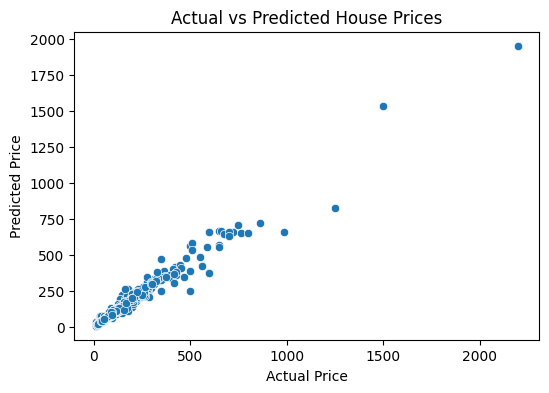

In [53]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


#### 🧠 Interpretation

Points close to diagonal indicate good predictions

Minor spread due to market variability

#### Final Insights & Inference
📌 Key Insights

Total square feet & price per sqft are the strongest predictors

More BHKs and bathrooms generally increase price

KNN performs well after proper feature scaling

Model captures local price patterns effectively

#### Conclusion

The KNN Regressor successfully predicts Bangalore house prices

Useful for:

Buyers estimating fair market value

Sellers pricing competitively

Real estate platforms offering instant valuations